## Project: End to End case Study Customer Credit Card Segmentation

### Business Pronlem:customer segmentation to define marketing strategy

### Statistical problem:Provide the strategic insights and implementation of strategies for given set of cluster 
characteristics

Overview

- Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense or another) to each other than to those in other groups (clusters).
or

- Clustering is the task of gathering samples into groups of similar samples according to some predefined similarity or dissimilarity measure (such as the Euclidean distance).
In this section we will explore a basic clustering task on some synthetic and real datasets.

Here are some common applications of clustering algorithms:
- Primarily used for exploratory data analysis and business applications like customer segmentation, product segmentation, market segmentation.
- Compression, in a data reduction sense
- Can be used as a preprocessing step for recommender systems
- Similarly:
- grouping related web news (e.g. Google News) and web search results
- grouping related stock quotes for investment portfolio management
- building customer profiles for market analysis
- Building a code book of prototype samples for unsupervised feature extraction
In this class we will explore a cluster technique called k-means & DBSCAN and understand how they works.

- Introduction to k-means() clustering
- Scaling of data before cluster analysis
- Dendogram to find out optimal number of clusters
- DBSCAN clustering
Can a clustering algorithm group them together by how nearer they are to each other?¶

-- Using K-means clustering technique

k-mean calculates the distance between the points and the center using euclidean distance and then allocates the points to different clusters.

 The following are few well-known clustering algorithms.
- sklearn.cluster.KMeans:
The simplest, yet effective clustering algorithm. Needs to be provided with the number of clusters in advance, and assumes that the data is normalized as input (but use a PCA model as preprocessor).
- sklearn.cluster.MeanShift:
Can find better looking clusters than KMeans but is not scalable to high number of samples.
- sklearn.cluster.DBSCAN:
Can detect irregularly shaped clusters based on density, i.e. sparse regions in the input space are likely to become inter-- - - - cluster boundaries. Can also detect outliers (samples that are not part of a cluster).
sklearn.cluster.AffinityPropagation:
- Clustering algorithm based on message passing between data points.
- sklearn.cluster.SpectralClustering:
- KMeans applied to a projection of the normalized graph Laplacian: finds normalized graph cuts if the affinity matrix is interpreted as an adjacency matrix of a graph.
- sklearn.cluster.Ward:
Ward implements hierarchical clustering based on the Ward algorithm, a variance-minimizing approach. At each step, it minimizes the sum of squared differences within all clusters (inertia criterion).
Of these, Ward, SpectralClustering, DBSCAN and Affinity Propagation can also work with precomputed similarity matrices.

### Part 2: Clustering evaluation (Finding optimal number of clusters)
This explains how to find optimal number of clusters in a given dataset by using various techniques. Different techniques discussed here are

- Dendogram
- Elbow method
- Silhoutte score Analysis We will first load the data into dataframe and scale the features and create clusters. And then various metrics are calculated to validate the number of cluster creations and what will be the optimal number of clusters.
The Silhouette Coefficient is a common metric for evaluating clustering "performance" in situations when the "true" cluster assignments are not known.

A Silhouette Coefficient is calculated for each observation:

𝑆𝐶=𝑏−𝑎𝑚𝑎𝑥(𝑎,𝑏)


- a = mean distance to all other points in its cluster
- b = mean distance to all other points in the next nearest cluster
It ranges from -1 (worst) to 1 (best). A global score is calculated by taking the mean score for all observations.

- The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).
- The silhouette ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
- If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.
- The silhouette can be calculated with any distance metric, such as the Euclidean distance or the Manhattan distance.


# Elbow Analysis

- The Elbow method is a method of interpretation and validation of consistency within cluster analysis designed to help finding the appropriate number of clusters in a dataset.
- Explained Variance: This method looks at the percentage of variance explained as a function of the number of clusters: One should choose a number of clusters so that adding another cluster doesn't give much better modeling of the data.
- if one plots the percentage of variance explained by the clusters against the number of clusters the first clusters will add much information (explain a lot of variance), but at some point the marginal gain in explained variance will drop, giving an angle in the graph. The number of clusters is chosen at this point, hence the "elbow criterion"
- Given a set of observations (x1, x2, …, xn), where each observation is a d-dimensional real vector, k-means clustering aims to partition the n observations into k (≤ n) sets S = {S1, S2, …, Sk} so as to minimize the within-cluster sum of squares (WCSS) (sum of distance functions of each point in the cluster to the K center).
-In other words, its objective is to find: argminS∑i=1k∑x∈Si∥x−μi∥2


#### Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import scipy.stats as stats
import pandas_profiling   #need to install using anaconda prompt (pip install pandas_profiling)


plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True

from matplotlib.backends.backend_pdf import PdfPages

In [2]:
from sklearn.cluster import KMeans

# center and scale the data
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis

In [4]:
Creditt= pd.read_csv("CC_GENERAL.csv")

#### Data Preprocessing

In [5]:
Creditt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [6]:
Creditt.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [20]:
#Detailed profiling using pandas profiling

pandas_profiling.ProfileReport(Creditt)

In [8]:
Creditt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [9]:
# Intital descriptive analysis of data.
Creditt.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

#### Missing Value treatment

In [10]:
Creditt.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [13]:
Creditt['CREDIT_LIMIT'].fillna(Creditt['CREDIT_LIMIT'].median(),inplace=True)
Creditt['MINIMUM_PAYMENTS'].fillna(Creditt['MINIMUM_PAYMENTS'].median(),inplace=True)


In [14]:
Creditt.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

### KPI's

### 1a) Monthly_avg_purchase and Cash Advance Amount

In [15]:
Creditt['Monthly_avg_purchase']=Creditt['PURCHASES']/Creditt['TENURE']
Creditt['Monthly_cash_advance']=Creditt['CASH_ADVANCE']/Creditt['TENURE']

In [17]:
Creditt[['Monthly_avg_purchase','Monthly_cash_advance']].head()

Monthly_avg_purchase  Monthly_cash_advance
0              7.950000              0.000000
1              0.000000            536.912124
2             64.430833              0.000000
3            124.916667             17.149001
4              1.333333              0.000000

### 1b) Purchase Type

In [19]:
Creditt[['ONEOFF_PURCHASES','ONEOFF_PURCHASES']].head()

ONEOFF_PURCHASES  ONEOFF_PURCHASES
0              0.00              0.00
1              0.00              0.00
2            773.17            773.17
3           1499.00           1499.00
4             16.00             16.00

In [20]:
Creditt[(Creditt['ONEOFF_PURCHASES']==0) & (Creditt['INSTALLMENTS_PURCHASES']==0)].shape

(2042, 20)

In [21]:
Creditt[(Creditt['ONEOFF_PURCHASES']>0) & (Creditt['INSTALLMENTS_PURCHASES']>0)].shape

(2774, 20)

In [22]:
Creditt[(Creditt['ONEOFF_PURCHASES']>0) & (Creditt['INSTALLMENTS_PURCHASES']==0)].shape

(1874, 20)

In [23]:
Creditt[(Creditt['ONEOFF_PURCHASES']==0) & (Creditt['INSTALLMENTS_PURCHASES']>0)].shape

(2260, 20)

#### So Basically there are four types of purchase behaviour are present  in data sets

1.People who only do One-Off Purchases

2.People who only do Installments Purchases

3.People who do both

4.People who do none.

#### Imputing function according to purchase behaviour

In [24]:
def purchase(Creditt):   
    if (Creditt['ONEOFF_PURCHASES']==0) & (Creditt['INSTALLMENTS_PURCHASES']==0):
        return 'none'
    if (Creditt['ONEOFF_PURCHASES']>0) & (Creditt['INSTALLMENTS_PURCHASES']>0):
         return 'both_oneoff_installment'
    if (Creditt['ONEOFF_PURCHASES']>0) & (Creditt['INSTALLMENTS_PURCHASES']==0):
        return 'one_off'
    if (Creditt['ONEOFF_PURCHASES']==0) & (Creditt['INSTALLMENTS_PURCHASES']>0):
        return 'installment'

In [25]:
Creditt['purchase_type']=Creditt.apply(purchase,axis=1)

In [26]:
Creditt['purchase_type'].value_counts()

both_oneoff_installment    2774
installment                2260
none                       2042
one_off                    1874
Name: purchase_type, dtype: int64

### 1c) Limit_Usage (balance to credit limit ratio)
Lower value means good credit score

In [27]:
Creditt['limit_usage']=Creditt.apply(lambda x: x['BALANCE']/x['CREDIT_LIMIT'], axis=1)

In [28]:
Creditt['limit_usage'].head()

0    0.040901
1    0.457495
2    0.332687
3    0.222223
4    0.681429
Name: limit_usage, dtype: float64

### 1d) Payment:MinPayment

In [29]:
Creditt['payment_minpay']=Creditt.apply(lambda x:x['PAYMENTS']/x['MINIMUM_PAYMENTS'],axis=1)
Creditt['payment_minpay'].describe()

count    8950.000000
mean        9.059164
std       118.180526
min         0.000000
25%         0.913275
50%         2.032717
75%         6.052729
max      6840.528861
Name: payment_minpay, dtype: float64

In [30]:
Creditt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 23 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8950 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [31]:
#dropping unique field from data sets and transforming into log
Cr_log=Creditt.drop(['CUST_ID','purchase_type'],axis=1).applymap(lambda x: np.log(x+1))

In [32]:

Cr_pre=Cr_log[[x for x in Cr_log.columns if x not in col ]]

### 2) Insights from new KPI's

In [33]:
# Average payment_minpayment ratio for each purchse type.
x=Creditt.groupby('purchase_type').apply(lambda x: np.mean(x['payment_minpay']))
type(x)
x.values

array([ 7.23698216, 13.2590037 , 10.08745106,  5.57108156])

In [36]:
ax.barh?

Text(0.5, 1.0, 'Mean payment_minpayment ratio for each purchse type')

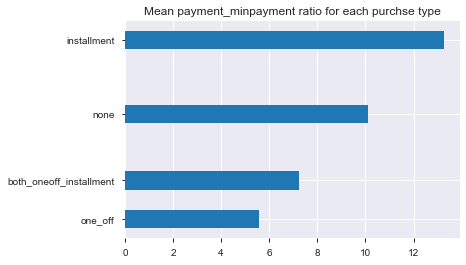

In [42]:
fig,ax=plt.subplots()
ax.barh(x,width=x.values)
ax.set(yticks=x,yticklabels=x.index);
plt.title('Mean payment_minpayment ratio for each purchse type')

In [43]:
Creditt.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  ...  PURCHASES_TRX  CREDIT_LIMIT      PAYMENTS  \
count             8950.000000  ...    8950.000000   8950.000000   8950.000000   
mean                 0.135144  ...      14.709832   4494.282473   1733.143852   
std                  0.200121  ...      24.857649   3638.646702   2895.063757   
min                  0.000000  ...       0.000000     50.000000      0.000000   
25%                  0.000000  ...       1.000000   1600.000000    383.276166   
50%                  0.000000  ...       7.000000   3000.000000    856.901546   
75%                  0.222222  ...      17.000000   6500.000000   1901.134317   
max                  1.500000  ...     358.000000  30000.000000  50721.483360   

       MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  Monthly_avg_purchase  \
count       8950.000000       8950.000000  8950.000000           8950.000000   
mean         844.906767          0.153715    11.517318             86.175173   
std         2332.792322          0.292499     1.338331            180.508787   
min            0.019163          0.000000     6.000000              0.000000   
25%          170.857654          0.000000    12.000000              3.399375   
50%          312.343947          0.000000    12.000000             31.936667   
75%          788.713501          0.142857    12.000000             97.228333   
max        76406.207520          1.000000    12.000000           4086.630833   

       Monthly_cash_advance  limit_usage  payment_minpay  
count           8950.000000  8950.000000     8950.000000  
mean              88.977984     0.388884        9.059164  
std              193.136115     0.389722      118.180526  
min                0.000000     0.000000        0.000000  
25%                0.000000     0.041494        0.913275  
50%                0.000000     0.302720        2.032717  
75%               99.085196     0.717571        6.052729  
max             3928.100980    15.909951     6840.528861  

[8 rows x 21 columns]

#### Insight 1: Customers With Installment Purchases are Paying Dues

In [44]:
Creditt[Creditt['purchase_type']=='n']

Empty DataFrame
Columns: [CUST_ID, BALANCE, BALANCE_FREQUENCY, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX, PURCHASES_TRX, CREDIT_LIMIT, PAYMENTS, MINIMUM_PAYMENTS, PRC_FULL_PAYMENT, TENURE, Monthly_avg_purchase, Monthly_cash_advance, purchase_type, limit_usage, payment_minpay]
Index: []

[0 rows x 23 columns]

Text(0.5, 1.0, 'Average cash advance taken by customers of different Purchase type : Both, None,Installment,One_Off')

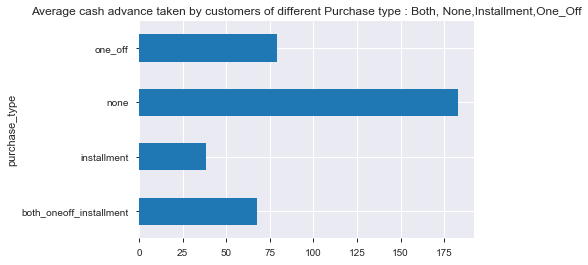

In [45]:
Creditt.groupby('purchase_type').apply(lambda x: np.mean(x['Monthly_cash_advance'])).plot.barh()

plt.title('Average cash advance taken by customers of different Purchase type : Both, None,Installment,One_Off')

#### Insight 2: Customers who don't do either one-off or installment purchases take more cash on advance.

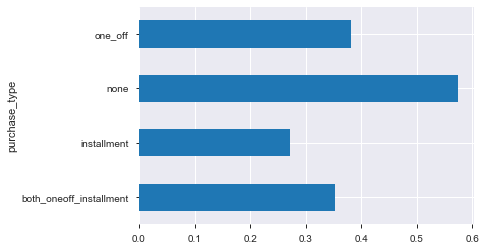

In [67]:
Creditt.groupby('purchase_type').apply(lambda x: np.mean(x['limit_usage'])).plot.barh()

#### Insight 3: Customers with installment purchases have good credit score.

In [68]:
Creditt.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  ...  \
0                    0.000000                          0.083333  ...   
1                    0.000000                          0.000000  ...   
2                    1.000000                          0.000000  ...   
3                    0.083333                          0.000000  ...   
4                    0.083333                          0.000000  ...   

   CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  \
0        1000.0   201.802084        139.509787          0.000000      12   
1        7000.0  4103.032597       1072.340217          0.222222      12   
2        7500.0   622.066742        627.284787          0.000000      12   
3        7500.0     0.000000        312.343947          0.000000      12   
4        1200.0   678.334763        244.791237          0.000000      12   

   Monthly_avg_purchase  Monthly_cash_advance  purchase_type  limit_usage  \
0              7.950000              0.000000    installment     0.040901   
1              0.000000            536.912124           none     0.457495   
2             64.430833              0.000000        one_off     0.332687   
3            124.916667             17.149001        one_off     0.222223   
4              1.333333              0.000000        one_off     0.681429   

   payment_minpay  
0        1.446508  
1        3.826241  
2        0.991682  
3        0.000000  
4        2.771075  

[5 rows x 23 columns]

In [69]:
numeric_var_names=[key for key in dict(Creditt.dtypes) if dict(Creditt.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(Creditt.dtypes) if dict(Creditt.dtypes)[key] in ['object']]
print(numeric_var_names)
print(cat_var_names)

['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE', 'Monthly_avg_purchase', 'Monthly_cash_advance', 'limit_usage', 'payment_minpay']
['CUST_ID', 'purchase_type']


as all variables are numeric and only cust  id is object  so need no need to take the cust id

In [82]:
Credittt=Creditt[numeric_var_names]
cat=Creditt[cat_var_names]
Credittt.shape

(8950, 21)

### Creating Data audit Report

In [71]:
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), 
                      x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), 
                      x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

Credittt_smmary=Credittt.apply(var_summary)

In [72]:
Credittt_smmary

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
N       8.950000e+03        8950.000000  8.950000e+03      8.950000e+03   
NMISS   0.000000e+00           0.000000  0.000000e+00      0.000000e+00   
SUM     1.400205e+07        7851.572994  8.978683e+06      5.302314e+06   
MEAN    1.564475e+03           0.877271  1.003205e+03      5.924374e+02   
MEDIAN  8.733852e+02           1.000000  3.612800e+02      3.800000e+01   
STD     2.081532e+03           0.236904  2.136635e+03      1.659888e+03   
VAR     4.332775e+06           0.056124  4.565208e+06      2.755228e+06   
MIN     0.000000e+00           0.000000  0.000000e+00      0.000000e+00   
P1      6.510059e-02           0.090909  0.000000e+00      0.000000e+00   
P5      8.814518e+00           0.272727  0.000000e+00      0.000000e+00   
P10     2.357553e+01           0.454545  0.000000e+00      0.000000e+00   
P25     1.282819e+02           0.888889  3.963500e+01      0.000000e+00   
P50     8.733852e+02           1.000000  3.612800e+02      3.800000e+01   
P75     2.054140e+03           1.000000  1.110130e+03      5.774050e+02   
P90     4.338564e+03           1.000000  2.542624e+03      1.600099e+03   
P95     5.909112e+03           1.000000  3.998619e+03      2.671094e+03   
P99     9.338805e+03           1.000000  8.977290e+03      6.689898e+03   
MAX     1.904314e+04           1.000000  4.903957e+04      4.076125e+04   

        INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
N                 8.950000e+03  8.950000e+03          8950.000000   
NMISS             0.000000e+00  0.000000e+00             0.000000   
SUM               3.679055e+06  8.760896e+06          4388.637408   
MEAN              4.110676e+02  9.788711e+02             0.490351   
MEDIAN            8.900000e+01  0.000000e+00             0.500000   
STD               9.043381e+02  2.097164e+03             0.401371   
VAR               8.178274e+05  4.398096e+06             0.161098   
MIN               0.000000e+00  0.000000e+00             0.000000   
P1                0.000000e+00  0.000000e+00             0.000000   
P5                0.000000e+00  0.000000e+00             0.000000   
P10               0.000000e+00  0.000000e+00             0.000000   
P25               0.000000e+00  0.000000e+00             0.083333   
P50               8.900000e+01  0.000000e+00             0.500000   
P75               4.686375e+02  1.113821e+03             0.916667   
P90               1.140070e+03  3.065535e+03             1.000000   
P95               1.750087e+03  4.647169e+03             1.000000   
P99               3.886241e+03  9.588163e+03             1.000000   
MAX               2.250000e+04  4.713721e+04             1.000000   

        ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
N                      8950.000000                       8950.000000   
NMISS                     0.000000                          0.000000   
SUM                    1811.996268                       3261.714207   
MEAN                      0.202458                          0.364437   
MEDIAN                    0.083333                          0.166667   
STD                       0.298336                          0.397448   
VAR                       0.089004                          0.157965   
MIN                       0.000000                          0.000000   
P1                        0.000000                          0.000000   
P5                        0.000000                          0.000000   
P10                       0.000000                          0.000000   
P25                       0.000000                          0.000000   
P50                       0.083333                          0.166667   
P75                       0.300000                          0.750000   
P90                       0.750000                          1.000000   
P95                       1.000000                          1.000000   
P99                       1.000000                 

### Handling Outliers

In [73]:
# - at 99%tile or 95%tile if required after including some particular vars like income
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

Credittt=Credittt.apply(lambda x: outlier_capping(x))

D:\DSP\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: clip_upper(threshold) is deprecated, use clip(upper=threshold) instead
  This is separate from the ipykernel package so we can avoid doing imports until
D:\DSP\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: clip_lower(threshold) is deprecated, use clip(lower=threshold) instead
  after removing the cwd from sys.path.


### Handling missings -

In [74]:
# Method2
def Missing_imputation(x):
    x = x.fillna(x.mean())
    return x

Credittt=Credittt.apply(lambda x: Missing_imputation(x))

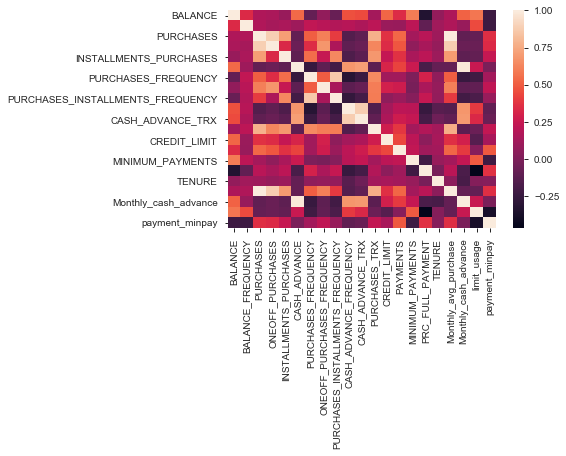

In [75]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(Credittt.corr())

In [76]:
Credittt.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
Monthly_avg_purchase                0
Monthly_cash_advance                0
limit_usage                         0
payment_minpay                      0
dtype: int64

In [168]:
cat.head()

CUST_ID purchase_type
0  C10001   installment
1  C10002          none
2  C10003       one_off
3  C10004       one_off
4  C10005       one_off

### Original dataset with categorical column converted to number type.

In [169]:
# Original dataset with categorical column converted to number type.
original=pd.concat([Credittt,pd.get_dummies(cat['purchase_type'])],axis=1)

In [171]:
cols=['BALANCE','PURCHASES','CASH_ADVANCE','TENURE','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','CREDIT_LIMIT']

# Note: Adding 1 for each value to avoid inf values
original[cols] = np.log(1 + original[cols])

original.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  1.555046           0.818182   1.717127              0.00   
1  2.205192           0.909091   0.000000              0.00   
2  2.177306           1.000000   2.034940            773.17   
3  2.130513           0.636364   2.117847           1499.00   
4  2.042224           1.000000   1.343703             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0      2.279408             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0      1.845568             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  ...  PRC_FULL_PAYMENT   TENURE  \
0                0.000000  ...           0.00000  1.27115   
1                0.250000  ...           0.18288  1.27115   
2                0.000000  ...           0.00000  1.27115   
3                0.083333  ...           0.00000  1.27115   
4                0.000000  ...           0.00000  1.27115   

   Monthly_avg_purchase  Monthly_cash_advance  limit_usage  payment_minpay  \
0              7.950000              0.000000     0.040901        1.446508   
1              0.000000            536.912124     0.457495        3.826241   
2             64.430833              0.000000     0.332687        0.991682   
3            124.916667             17.149001     0.222223        0.000000   
4              1.333333              0.000000     0.681429        2.771075   

   both_oneoff_installment  installment  none  one_off  
0                        0            1     0        0  
1                        0            0     1        0  
2                        0            0     0        1  
3                        0            0     0        1  
4                        0            0     0        1  

[5 rows x 25 columns]

In [172]:
cat = original[['both_oneoff_installment','installment','none','one_off']]

In [92]:
Credit = original.drop(columns=['ONEOFF_PURCHASES','Monthly_avg_purchase','Monthly_cash_advance'])

In [93]:
Credit.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  INSTALLMENTS_PURCHASES  \
0  3.735304           0.818182   4.568506                    95.4   
1  8.071989           0.909091   0.000000                     0.0   
2  7.822504           1.000000   6.651791                     0.0   
3  7.419183           0.636364   7.313220                     0.0   
4  6.707735           1.000000   2.833213                     0.0   

   CASH_ADVANCE  PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
0      0.000000             0.166667                    0.000000   
1      8.770896             0.000000                    0.000000   
2      0.000000             1.000000                    1.000000   
3      5.331694             0.083333                    0.083333   
4      0.000000             0.083333                    0.083333   

   PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  \
0                          0.083333                0.000000                 0   
1                          0.000000                0.250000                 4   
2                          0.000000                0.000000                 0   
3                          0.000000                0.083333                 1   
4                          0.000000                0.000000                 0   

   ...  PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  limit_usage  \
0  ...  5.312231          4.945277          0.000000  2.564949     0.040901   
1  ...  8.319725          6.978531          0.200671  2.564949     0.457495   
2  ...  6.434654          6.442994          0.000000  2.564949     0.332687   
3  ...  0.000000          5.747301          0.000000  2.564949     0.222223   
4  ...  6.521114          5.504483          0.000000  2.564949     0.681429   

   payment_minpay  both_oneoff_installment  installment  none  one_off  
0        1.446508                        0            1     0        0  
1        3.826241                        0            0     1        0  
2        0.991682                        0            0     0        1  
3        0.000000                        0            0     0        1  
4        2.771075                        0            0     0        1  

[5 rows x 22 columns]

In [94]:
Credit.describe()

BALANCE  BALANCE_FREQUENCY    PURCHASES  INSTALLMENTS_PURCHASES  \
count  8950.000000        8950.000000  8950.000000             8950.000000   
mean      6.161637           0.877271     4.899647              411.067645   
std       2.013303           0.236904     2.916872              904.338115   
min       0.000000           0.000000     0.000000                0.000000   
25%       4.861995           0.888889     3.704627                0.000000   
50%       6.773521           1.000000     5.892417               89.000000   
75%       7.628099           1.000000     7.013133              468.637500   
max       9.854515           1.000000    10.800403            22500.000000   

       CASH_ADVANCE  PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
count   8950.000000          8950.000000                 8950.000000   
mean       3.319086             0.490351                    0.202458   
std        3.566298             0.401371                    0.298336   
min        0.000000             0.000000                    0.000000   
25%        0.000000             0.083333                    0.000000   
50%        0.000000             0.500000                    0.083333   
75%        7.016449             0.916667                    0.300000   
max       10.760839             1.000000                    1.000000   

       PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  \
count                       8950.000000             8950.000000   
mean                           0.364437                0.135144   
std                            0.397448                0.200121   
min                            0.000000                0.000000   
25%                            0.000000                0.000000   
50%                            0.166667                0.000000   
75%                            0.750000                0.222222   
max                            1.000000                1.500000   

       CASH_ADVANCE_TRX  ...     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  \
count       8950.000000  ...  8950.000000       8950.000000       8950.000000   
mean           3.248827  ...     6.624540          5.916079          0.117730   
std            6.824647  ...     1.591763          1.169929          0.211617   
min            0.000000  ...     0.000000          0.018982          0.000000   
25%            0.000000  ...     5.951361          5.146667          0.000000   
50%            0.000000  ...     6.754489          5.747301          0.000000   
75%            4.000000  ...     7.550732          6.671670          0.133531   
max          123.000000  ...    10.834125         11.243832          0.693147   

            TENURE  limit_usage  payment_minpay  both_oneoff_installment  \
count  8950.000000  8950.000000     8950.000000              8950.000000   
mean      2.519680     0.388884        9.059164                 0.309944   
std       0.130367     0.389722      118.180526                 0.462496   
min       1.945910     0.000000        0.000000                 0.000000   
25%       2.564949     0.041494        0.913275                 0.000000   
50%       2.564949     0.302720        2.032717                 0.000000   
75%       2.564949     0.717571        6.052729                 1.000000   
max       2.564949    15.909951     6840.528861                 1.000000   

       installment         none      one_off  
count  8950.000000  8950.000000  8950.000000  
mean      0.252514     0.228156     0.209385  
std       0.434479     0.419667     0.406893  
min       0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000  
75%       1.000000     0.000000     0.000000  
max       1.000000     1.000000     1.000000  

[8 rows x 22 columns]

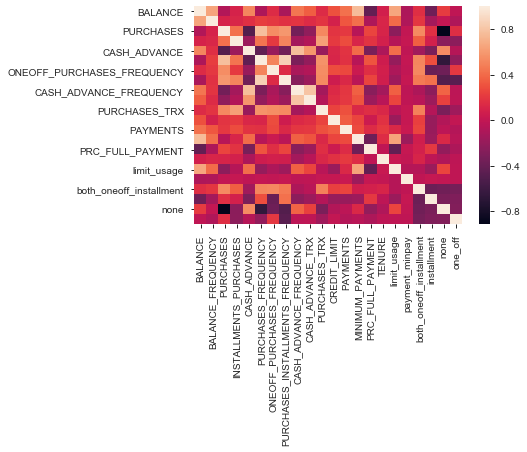

In [119]:
sns.heatmap(Credit.corr())


### Standardizing the  data

In [121]:
sc=StandardScaler()

Credit_scaled=sc.fit_transform(Credit)

In [122]:
pd.DataFrame(Credit_scaled).head(5)

0         1         2         3         4         5         6   \
0 -1.205218 -0.249434 -0.113532 -0.349079 -0.930733 -0.806490 -0.678661   
1  0.948918  0.134325 -1.679855 -0.454576  1.528788 -1.221758 -0.678661   
2  0.824993  0.518084  0.600727 -0.454576 -0.930733  1.269843  2.673451   
3  0.624653 -1.016953  0.827499 -0.454576  0.564372 -1.014125 -0.399319   
4  0.271260  0.518084 -0.708481 -0.454576 -0.930733 -1.014125 -0.399319   

         7         8         9   ...        12        13        14        15  \
0 -0.707313 -0.675349 -0.476070  ... -0.824484 -0.829841 -0.556368  0.347262   
1 -0.916995  0.573963  0.110074  ...  1.065033  0.908184  0.391958  0.347262   
2 -0.916995 -0.675349 -0.476070  ... -0.119300  0.450407 -0.556368  0.347262   
3 -0.916995 -0.258913 -0.329534  ... -4.161996 -0.144271 -0.556368  0.347262   
4 -0.916995 -0.675349 -0.476070  ... -0.064979 -0.351833 -0.556368  0.347262   

         16        17        18        19        20        21  
0 -0.892951 -0.064419 -0.670193  1.720516 -0.543690 -0.514625  
1  0.176063 -0.044282 -0.670193 -0.581221  1.839282 -0.514625  
2 -0.144206 -0.068268 -0.670193 -0.581221 -0.543690  1.943162  
3 -0.427665 -0.076660 -0.670193 -0.581221 -0.543690  1.943162  
4  0.750693 -0.053210 -0.670193 -0.581221 -0.543690  1.943162  

[5 rows x 22 columns]

In [123]:
pd.DataFrame(Credit_scaled).describe()

0             1             2             3             4   \
count  8.950000e+03  8.950000e+03  8.950000e+03  8.950000e+03  8.950000e+03   
mean  -2.666861e-17  1.209548e-14  1.379306e-15  2.275424e-15 -6.788549e-16   
std    1.000056e+00  1.000056e+00  1.000056e+00  1.000056e+00  1.000056e+00   
min   -3.060633e+00 -3.703271e+00 -1.679855e+00 -4.545762e-01 -9.307329e-01   
25%   -6.455634e-01  4.904486e-02 -4.097152e-01 -4.545762e-01 -9.307329e-01   
50%    3.039373e-01  5.180838e-01  3.403734e-01 -3.561562e-01 -9.307329e-01   
75%    7.284269e-01  5.180838e-01  7.246132e-01  6.366321e-02  1.036809e+00   
max    1.834341e+00  5.180838e-01  2.023087e+00  2.442689e+01  2.086805e+00   

                 5             6             7             8             9   \
count  8.950000e+03  8.950000e+03  8.950000e+03  8.950000e+03  8.950000e+03   
mean  -3.716084e-16  2.021052e-15  2.353921e-16  5.729495e-16 -7.151821e-16   
std    1.000056e+00  1.000056e+00  1.000056e+00  1.000056e+00  1.000056e+00   
min   -1.221758e+00 -6.786608e-01 -9.169952e-01 -6.753489e-01 -4.760698e-01   
25%   -1.014125e+00 -6.786608e-01 -9.169952e-01 -6.753489e-01 -4.760698e-01   
50%    2.404259e-02 -3.993193e-01 -4.976286e-01 -6.753489e-01 -4.760698e-01   
75%    1.062211e+00  3.269728e-01  9.701506e-01  4.351492e-01  1.100739e-01   
max    1.269843e+00  2.673451e+00  1.599199e+00  6.820521e+00  1.754785e+01   

       ...            12            13            14            15  \
count  ...  8.950000e+03  8.950000e+03  8.950000e+03  8.950000e+03   
mean   ...  4.079418e-16 -1.783055e-16 -2.008003e-15 -6.954586e-16   
std    ...  1.000056e+00  1.000056e+00  1.000056e+00  1.000056e+00   
min    ... -4.161996e+00 -5.040840e+00 -5.563681e-01 -4.401425e+00   
25%    ... -4.229376e-01 -6.576937e-01 -5.563681e-01  3.472622e-01   
50%    ...  8.164312e-02 -1.442709e-01 -5.563681e-01  3.472622e-01   
75%    ...  5.818980e-01  6.458797e-01  7.467219e-02  3.472622e-01   
max    ...  2.644753e+00  4.554165e+00  2.719298e+00  3.472622e-01   

                 16            17            18            19            20  \
count  8.950000e+03  8.950000e+03  8.950000e+03  8.950000e+03  8.950000e+03   
mean   7.807225e-17  4.842495e-18 -3.752852e-15  8.733374e-15 -4.507133e-16   
std    1.000056e+00  1.000056e+00  1.000056e+00  1.000056e+00  1.000056e+00   
min   -9.979057e-01 -7.665959e-02 -6.701925e-01 -5.812208e-01 -5.436904e-01   
25%   -8.914292e-01 -6.893135e-02 -6.701925e-01 -5.812208e-01 -5.436904e-01   
50%   -2.211018e-01 -5.945853e-02 -6.701925e-01 -5.812208e-01 -5.436904e-01   
75%    8.434381e-01 -2.544077e-02  1.492109e+00  1.720516e+00 -5.436904e-01   
max    3.982827e+01  5.780861e+01  1.492109e+00  1.720516e+00  1.839282e+00   

                 21  
count  8.950000e+03  
mean  -2.274580e-15  
std    1.000056e+00  
min   -5.146250e-01  
25%   -5.146250e-01  
50%   -5.146250e-01  
75%   -5.146250e-01  
max    1.943162e+00  

[8 rows x 22 columns]

### Applying PCA

In [124]:

var_ratio={}
for n in range(4,15):
    pc=PCA(n_components=n)
    cr_pca=pc.fit(Credit_scaled)
    var_ratio[n]=sum(cr_pca.explained_variance_ratio_)

In [125]:
pc = PCA(n_components=5)
p=pc.fit(Credit_scaled)
Credit_scaled.shape

(8950, 22)

In [126]:
p.explained_variance_

array([5.6153582 , 4.21962196, 1.94517905, 1.59150182, 1.27181284])

In [127]:
var_ratio

{4: 0.6077348581804313,
 5: 0.6655380767674148,
 6: 0.7181990359559575,
 7: 0.7635352615722485,
 8: 0.8042039192564611,
 9: 0.8421362787399371,
 10: 0.87457971067271,
 11: 0.8995582713841069,
 12: 0.9209299948872158,
 13: 0.9402967870141407,
 14: 0.9546591425161848}

### We are selecting 5 components as it is explaining 66% variance

In [233]:
pc.explained_variance_  #Eigen value

array([5.6153582 , 4.21962196, 1.94517905, 1.59150182, 1.27181284])

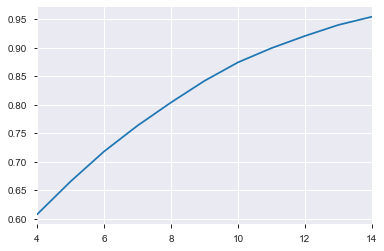

In [234]:
pd.Series(var_ratio).plot()

In [235]:
pc_final=PCA(n_components=5).fit(Credit_scaled)

Reduced_cr=pc_final.fit_transform(Credit_scaled)

In [236]:
dd=pd.DataFrame(Reduced_cr)

In [237]:
dd.shape

(8950, 5)

In [238]:
col_list=Credit.columns

In [239]:
col_list

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'INSTALLMENTS_PURCHASES',
       'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE', 'limit_usage',
       'payment_minpay', 'both_oneoff_installment', 'installment', 'none',
       'one_off'],
      dtype='object')

In [240]:
pd.DataFrame(pc_final.components_.T, columns=['PC_' +str(i) for i in range(5)],index=col_list)

PC_0      PC_1      PC_2      PC_3  \
BALANCE                           0.156568  0.402952  0.005589  0.188638   
BALANCE_FREQUENCY                 0.010743  0.310405  0.099624  0.244335   
PURCHASES                        -0.356825  0.122202 -0.138004  0.130645   
INSTALLMENTS_PURCHASES           -0.215592  0.187526  0.169404 -0.120659   
CASH_ADVANCE                      0.303084  0.196048  0.068488 -0.203283   
PURCHASES_FREQUENCY              -0.357962  0.135650  0.135196  0.045317   
ONEOFF_PURCHASES_FREQUENCY       -0.199794  0.215236 -0.397358 -0.055523   
PURCHASES_INSTALLMENTS_FREQUENCY -0.315167  0.107631  0.375004 -0.002138   
CASH_ADVANCE_FREQUENCY            0.259558  0.214519  0.072230 -0.260159   
CASH_ADVANCE_TRX                  0.197997  0.202812  0.067961 -0.288454   
PURCHASES_TRX                    -0.248438  0.245787  0.009425 -0.100077   
CREDIT_LIMIT                     -0.048274  0.215808 -0.175719 -0.301558   
PAYMENTS                         -0.041787  0.294581 -0.040260 -0.197899   
MINIMUM_PAYMENTS                  0.131538  0.342759  0.092714  0.269476   
PRC_FULL_PAYMENT                 -0.198789 -0.103260  0.019945 -0.334544   
TENURE                           -0.051368  0.090343 -0.047193  0.092551   
limit_usage                       0.198311  0.239196  0.133272  0.392563   
payment_minpay                   -0.018577 -0.042260 -0.007098 -0.191670   
both_oneoff_installment          -0.218054  0.245824 -0.075489 -0.144695   
installment                      -0.126287 -0.188775  0.467661  0.141044   
none                              0.323988 -0.014692  0.135805 -0.224726   
one_off                           0.048541 -0.062689 -0.553631  0.245644   

                                      PC_4  
BALANCE                          -0.049504  
BALANCE_FREQUENCY                -0.050937  
PURCHASES                         0.273525  
INSTALLMENTS_PURCHASES           -0.098927  
CASH_ADVANCE                      0.138432  
PURCHASES_FREQUENCY               0.155698  
ONEOFF_PURCHASES_FREQUENCY       -0.026101  
PURCHASES_INSTALLMENTS_FREQUENCY  0.065963  
CASH_ADVANCE_FREQUENCY            0.378527  
CASH_ADVANCE_TRX                  0.438146  
PURCHASES_TRX                    -0.099895  
CREDIT_LIMIT                     -0.001666  
PAYMENTS                         -0.032161  
MINIMUM_PAYMENTS                  0.011724  
PRC_FULL_PAYMENT                  0.039923  
TENURE                           -0.308469  
limit_usage                      -0.031094  
payment_minpay                   -0.025528  
both_oneoff_installment          -0.228784  
installment                       0.311371  
none                             -0.394742  
one_off                           0.334703

### Clustering

In [146]:
from sklearn.cluster import KMeans
km_4=KMeans(n_clusters=4,random_state=123)
km_4.fit(Reduced_cr)
km_4.labels_

array([1, 2, 0, ..., 1, 2, 0])

In [147]:
pd.Series(km_4.labels_).value_counts()

3    2499
1    2289
2    2216
0    1946
dtype: int64

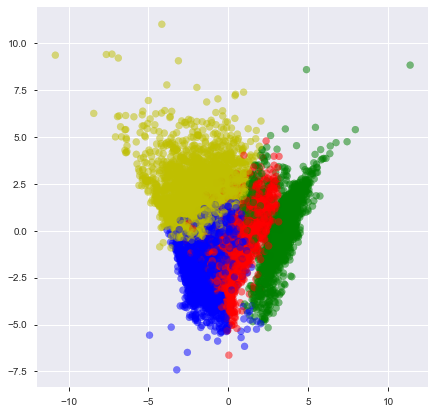

In [148]:
color_map={0:'r',1:'b',2:'g',3:'y'}
label_color=[color_map[l] for l in km_4.labels_]
plt.figure(figsize=(7,7))
plt.scatter(Reduced_cr[:,0],Reduced_cr[:,1],c=label_color,cmap='Spectral',alpha=0.5)

In [153]:
Credit.dtypes

BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                              float64
limit_usage                         float64
payment_minpay                      float64
both_oneoff_installment               uint8
installment                           uint8
none                                  uint8
one_off                               uint8
dtype: object

In [154]:
df_pair_plot=pd.DataFrame(Reduced_cr,columns=['PC_' +str(i) for i in range(5)])

In [155]:
df_pair_plot['Cluster']=km_4.labels_

D:\DSP\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
D:\DSP\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\DSP\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


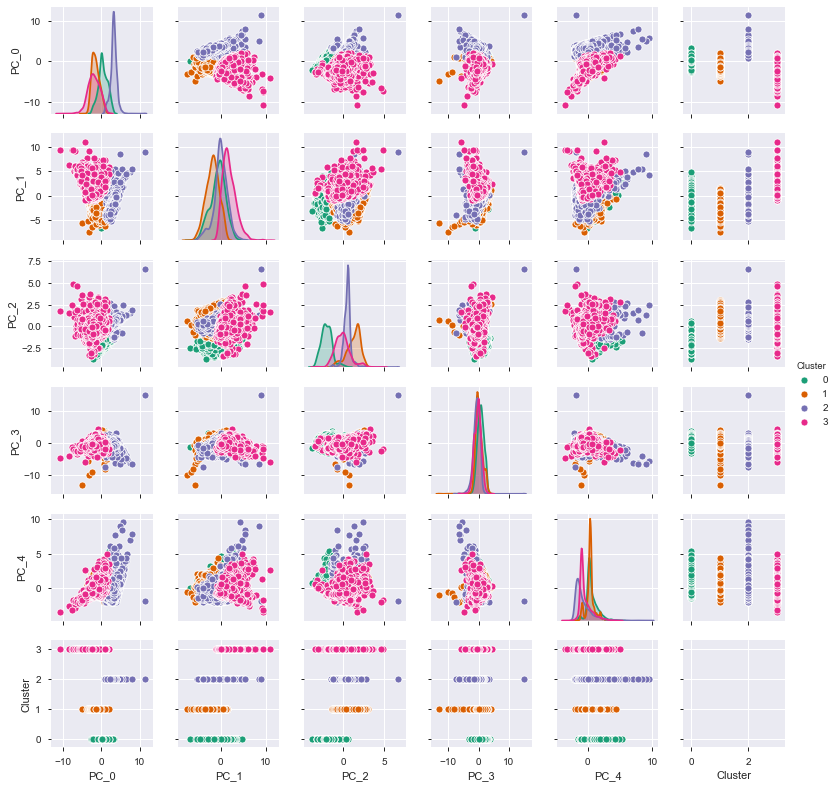

In [156]:
#pairwise relationship of components on the data
sns.pairplot(df_pair_plot,hue='Cluster', palette= 'Dark2', diag_kind='kde',size=1.85)

### It shows that first two components are able to indentify clusters

In [241]:
# Key performace variable selection . here i am dropping varibales which are used in derving new KPI
col_kpi=['PURCHASES_TRX','Monthly_avg_purchase','Monthly_cash_advance','limit_usage','CASH_ADVANCE_TRX',
         'payment_minpay','both_oneoff_installment','installment','one_off','none','CREDIT_LIMIT']

In [157]:
km_5=KMeans(n_clusters=5,random_state=123)
km_5=km_5.fit(Reduced_cr)
km_5.labels_

array([1, 2, 4, ..., 1, 2, 4])

In [158]:
pd.Series(km_5.labels_).value_counts()

1    2077
2    2029
3    1979
4    1678
0    1187
dtype: int64

Text(0, 0.5, 'PC_1')

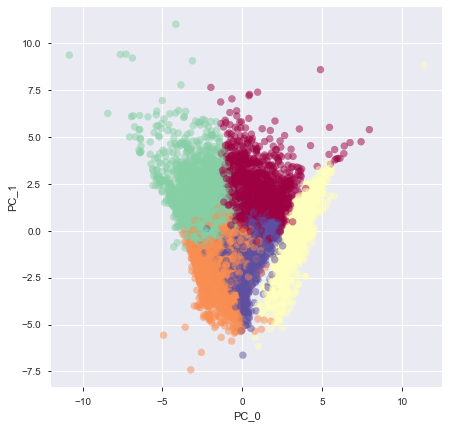

In [160]:
plt.figure(figsize=(7,7))
plt.scatter(Reduced_cr[:,0],Reduced_cr[:,1],c=km_5.labels_,cmap='Spectral',alpha=0.5)
plt.xlabel('PC_0')
plt.ylabel('PC_1')

### Insights

-  Clusters are clearly distinguishing behavior within customers
-  Findings through clustering is validating Insights dervied from KPI. (as shown above in Insights from KPI

In [177]:
cluster_df_5=pd.concat([original[col_kpi],pd.Series(km_5.labels_,name='Cluster_5')],axis=1)

In [178]:
# Finding Mean of features for each cluster
cluster_df_5.groupby('Cluster_5')\
.apply(lambda x: x[col_kpi].mean()).T

Cluster_5                         0          1           2           3  \
PURCHASES_TRX             13.868576  11.025999    0.002957   41.263770   
Monthly_avg_purchase      79.344829  42.080665    0.000895  243.133082   
Monthly_cash_advance     284.458881   5.971687  178.420825   21.574597   
limit_usage                0.671519   0.176705    0.574963    0.310463   
CASH_ADVANCE_TRX          11.347094   0.185845    5.979793    0.785750   
payment_minpay             3.009591  15.381916    9.468046    8.415012   
both_oneoff_installment    0.434709   0.085219    0.000000    0.975745   
installment                0.277169   0.912374    0.000986    0.017180   
one_off                    0.278854   0.000000    0.000493    0.007074   
none                       0.009267   0.002407    0.998521    0.000000   
CREDIT_LIMIT               2.237473   2.162425    2.191378    2.247674   

Cluster_5                        4  
PURCHASES_TRX             6.330751  
Monthly_avg_purchase     64.673277  
Monthly_cash_advance     24.782531  
limit_usage               0.319065  
CASH_ADVANCE_TRX          0.914184  
payment_minpay            5.777665  
both_oneoff_installment   0.089392  
installment               0.000000  
one_off                   0.910608  
none                      0.000000  
CREDIT_LIMIT              2.193283

In [183]:
s1=cluster_df_5.groupby('Cluster_5').apply(lambda x: x['Cluster_5'].value_counts())
s1

Cluster_5   
0          0    1187
1          1    2077
2          2    2029
3          3    1979
4          4    1678
Name: Cluster_5, dtype: int64

In [184]:
km_6=KMeans(n_clusters=6).fit(Reduced_cr)
km_6.labels_

array([1, 2, 4, ..., 1, 2, 4])

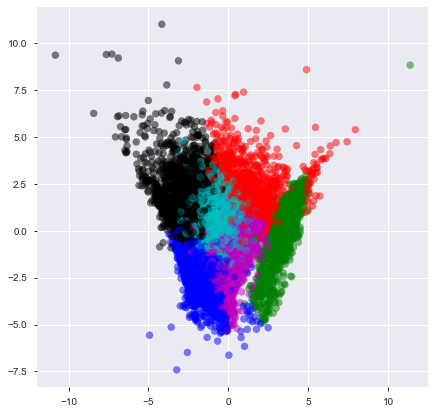

In [185]:
color_map={0:'r',1:'b',2:'g',3:'c',4:'m',5:'k'}
label_color=[color_map[l] for l in km_6.labels_]
plt.figure(figsize=(7,7))
plt.scatter(Reduced_cr[:,0],Reduced_cr[:,1],c=label_color,cmap='Spectral',alpha=0.5)

### With 5 clusters :
- we have a group of customers (cluster 2) having highest avergae purchases but there is Cluster 4 also having highest cash advance & secong highest purchase behaviour but their type of purchases are same.

- Cluster 0 and Cluster 4 are behaving similar in terms of Credit_limit and have cash transactions is on higher side

### Choosing number clusters using Silhouette Coefficient

In [188]:
from sklearn.metrics import calinski_harabaz_score,silhouette_score

In [189]:
score={}
score_c={}
for n in range(3,10):
    km_score=KMeans(n_clusters=n)
    km_score.fit(Reduced_cr)
    score_c[n]=calinski_harabaz_score(Reduced_cr,km_score.labels_)
    score[n]=silhouette_score(Reduced_cr,km_score.labels_)

D:\DSP\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
D:\DSP\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
D:\DSP\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
D:\DSP\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' 

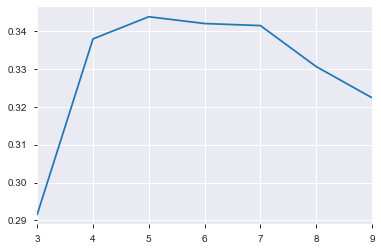

In [190]:
pd.Series(score).plot()

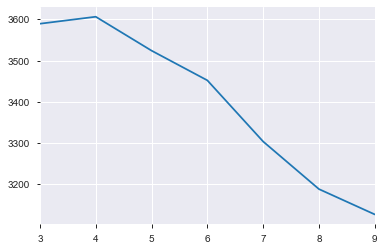

In [191]:
pd.Series(score_c).plot()

In [194]:
Credit.head(5)

BALANCE  BALANCE_FREQUENCY  PURCHASES  INSTALLMENTS_PURCHASES  \
0  3.735304           0.818182   4.568506                    95.4   
1  8.071989           0.909091   0.000000                     0.0   
2  7.822504           1.000000   6.651791                     0.0   
3  7.419183           0.636364   7.313220                     0.0   
4  6.707735           1.000000   2.833213                     0.0   

   CASH_ADVANCE  PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
0      0.000000             0.166667                    0.000000   
1      8.770896             0.000000                    0.000000   
2      0.000000             1.000000                    1.000000   
3      5.331694             0.083333                    0.083333   
4      0.000000             0.083333                    0.083333   

   PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  \
0                          0.083333                0.000000                 0   
1                          0.000000                0.250000                 4   
2                          0.000000                0.000000                 0   
3                          0.000000                0.083333                 1   
4                          0.000000                0.000000                 0   

   ...  PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  limit_usage  \
0  ...  5.312231          4.945277          0.000000  2.564949     0.040901   
1  ...  8.319725          6.978531          0.200671  2.564949     0.457495   
2  ...  6.434654          6.442994          0.000000  2.564949     0.332687   
3  ...  0.000000          5.747301          0.000000  2.564949     0.222223   
4  ...  6.521114          5.504483          0.000000  2.564949     0.681429   

   payment_minpay  both_oneoff_installment  installment  none  one_off  
0        1.446508                        0            1     0        0  
1        3.826241                        0            0     1        0  
2        0.991682                        0            0     0        1  
3        0.000000                        0            0     0        1  
4        2.771075                        0            0     0        1  

[5 rows x 22 columns]

Note
If we consider sc score 6 segment is best

### Semgment Distribution
### Finding Optimal number of clusters (optional)
### Elbow Analysis

In [198]:
cluster_range = range( 2, 20 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( Reduced_cr )
    cluster_errors.append( clusters.inertia_ )

In [199]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df[0:10]

num_clusters  cluster_errors
0             2    93863.149716
1             3    72704.400712
2             4    59310.112447
3             5    50871.420061
4             6    44726.613826
5             7    40738.222156
6             8    37502.038013
7             9    34506.751522
8            10    32138.632303
9            11    30056.615377

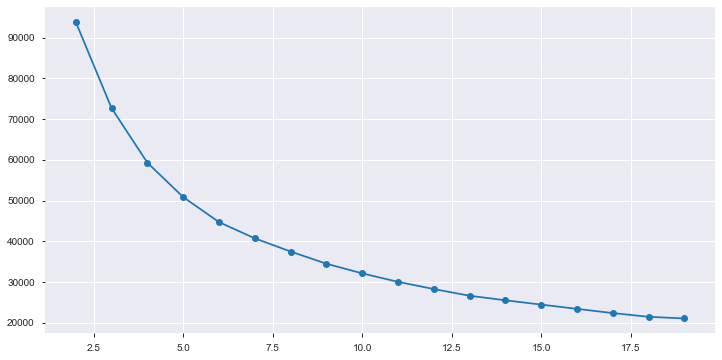

In [200]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

### Note:
- The elbow diagram shows that the gain in explained variance reduces significantly from 3 to 4 to 5. So, optimal number of clusters could either 4 or 5.
- The actual number of clusters chosen can be finally based on business context and convenience of dealing with number of segments or clusters

### Profiling

In [203]:
km_3=KMeans(n_clusters=3,random_state=123).fit(Reduced_cr)

km_4=KMeans(n_clusters=4,random_state=123).fit(Reduced_cr)
#km_5.labels_a

km_5=KMeans(n_clusters=5,random_state=123).fit(Reduced_cr)
#km_5.labels_

km_6=KMeans(n_clusters=6,random_state=123).fit(Reduced_cr)
#km_6.labels_

km_7=KMeans(n_clusters=7,random_state=123).fit(Reduced_cr)
#km_7.labels_

km_8=KMeans(n_clusters=8,random_state=123).fit(Reduced_cr)
#km_5.labels_

In [204]:
# save the cluster labels and sort by cluster
Credittt['cluster_3'] = km_3.labels_
Credittt['cluster_4'] = km_4.labels_
Credittt['cluster_5'] = km_5.labels_
Credittt['cluster_6'] = km_6.labels_
Credittt['cluster_7'] = km_7.labels_
Credittt['cluster_8'] = km_8.labels_

D:\DSP\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [201]:
Credittt.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  ...  PURCHASES_TRX  CREDIT_LIMIT     PAYMENTS  \
0                0.000000  ...              2        1000.0   201.802084   
1                0.250000  ...              0        7000.0  4103.032597   
2                0.000000  ...             12        7500.0   622.066742   
3                0.083333  ...              1        7500.0     0.000000   
4                0.000000  ...              1        1200.0   678.334763   

   MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Monthly_avg_purchase  \
0        139.509787          0.000000      12              7.950000   
1       1072.340217          0.222222      12              0.000000   
2        627.284787          0.000000      12             64.430833   
3        312.343947          0.000000      12            124.916667   
4        244.791237          0.000000      12              1.333333   

   Monthly_cash_advance  limit_usage  payment_minpay  
0              0.000000     0.040901        1.446508  
1            536.912124     0.457495        3.826241  
2              0.000000     0.332687        0.991682  
3             17.149001     0.222223        0.000000  
4              0.000000     0.681429        2.771075  

[5 rows x 21 columns]

In [209]:
size=pd.concat([pd.Series(Credittt.cluster_3.size), pd.Series.sort_index(Credittt.cluster_3.value_counts()), pd.Series.sort_index(Credittt.cluster_4.value_counts()),
           pd.Series.sort_index(Credittt.cluster_5.value_counts()), pd.Series.sort_index(Credittt.cluster_6.value_counts()),
           pd.Series.sort_index(Credittt.cluster_7.value_counts()), pd.Series.sort_index(Credittt.cluster_8.value_counts())])

In [211]:
#size

In [212]:
Seg_size=pd.DataFrame(size, columns=['Seg_size'])
Seg_Pct = pd.DataFrame(size/Credittt.cluster_3.size, columns=['Seg_Pct'])

In [213]:
Seg_Pct.T

0         0         1         2        0         1         2  \
Seg_Pct  1.0  0.354078  0.322235  0.323687  0.21743  0.255754  0.247598   

                3         0         1  ...         5         6         0  \
Seg_Pct  0.279218  0.132626  0.232067  ...  0.100112  0.214525  0.086704   

                1         2         3         4        5         6         7  
Seg_Pct  0.080223  0.064358  0.152737  0.206034  0.12581  0.153743  0.130391  

[1 rows x 34 columns]

In [214]:
pd.concat([Seg_size.T, Seg_Pct.T], axis=0)

0            0            1            2           0  \
Seg_size  8950.0  3169.000000  2884.000000  2897.000000  1946.00000   
Seg_Pct      1.0     0.354078     0.322235     0.323687     0.21743   

                    1            2            3            0            1  \
Seg_size  2289.000000  2216.000000  2499.000000  1187.000000  2077.000000   
Seg_Pct      0.255754     0.247598     0.279218     0.132626     0.232067   

          ...           5            6           0           1           2  \
Seg_size  ...  896.000000  1920.000000  776.000000  718.000000  576.000000   
Seg_Pct   ...    0.100112     0.214525    0.086704    0.080223    0.064358   

                    3            4           5            6            7  
Seg_size  1367.000000  1844.000000  1126.00000  1376.000000  1167.000000  
Seg_Pct      0.152737     0.206034     0.12581     0.153743     0.130391  

[2 rows x 34 columns]

## Original Data

In [215]:
Credittt.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  ...  Monthly_avg_purchase  Monthly_cash_advance  \
0                0.000000  ...              7.950000              0.000000   
1                0.250000  ...              0.000000            536.912124   
2                0.000000  ...             64.430833              0.000000   
3                0.083333  ...            124.916667             17.149001   
4                0.000000  ...              1.333333              0.000000   

   limit_usage  payment_minpay  cluster_3  cluster_4  cluster_5  cluster_6  \
0     0.040901        1.446508          0          1          1          1   
1     0.457495        3.826241          2          2          2          2   
2     0.332687        0.991682          1          0          4          0   
3     0.222223        0.000000          0          0          4          0   
4     0.681429        2.771075          0          0          4          0   

   cluster_7  cluster_8  
0          2          3  
1          6          4  
2          3          7  
3          3          7  
4          3          7  

[5 rows x 27 columns]

In [216]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster
Profling_output = pd.concat([Credittt.apply(lambda x: x.mean()).T, Credittt.groupby('cluster_3').apply(lambda x: x.mean()).T, Credittt.groupby('cluster_4').apply(lambda x: x.mean()).T,
          Credittt.groupby('cluster_5').apply(lambda x: x.mean()).T, Credittt.groupby('cluster_6').apply(lambda x: x.mean()).T,
          Credittt.groupby('cluster_7').apply(lambda x: x.mean()).T, Credittt.groupby('cluster_8').apply(lambda x: x.mean()).T], axis=1)


In [217]:
Profling_output

0            0            1  \
BALANCE                           1564.474828   284.339018  2070.591697   
BALANCE_FREQUENCY                    0.877271     0.737292     0.980856   
PURCHASES                         1003.204834   499.433023  2419.005260   
ONEOFF_PURCHASES                   592.437371   236.639886  1454.446931   
INSTALLMENTS_PURCHASES             411.067645   263.241363   964.851581   
CASH_ADVANCE                       978.871112    77.169956   737.107574   
PURCHASES_FREQUENCY                  0.490351     0.530936     0.854217   
ONEOFF_PURCHASES_FREQUENCY           0.202458     0.109505     0.454775   
PURCHASES_INSTALLMENTS_FREQUENCY     0.364437     0.403595     0.657794   
CASH_ADVANCE_FREQUENCY               0.135144     0.018388     0.097198   
CASH_ADVANCE_TRX                     3.248827     0.299148     2.385576   
PURCHASES_TRX                       14.709832     8.402020    34.875520   
CREDIT_LIMIT                      4494.282473  3339.449034  5904.782569   
PAYMENTS                          1733.143852   758.928629  2730.607465   
MINIMUM_PAYMENTS                   844.906767   246.282308  1212.889430   
PRC_FULL_PAYMENT                     0.153715     0.253677     0.168155   
TENURE                              11.517318    11.352793    11.840846   
Monthly_avg_purchase                86.175173    44.934460   204.759660   
Monthly_cash_advance                88.977984     7.795385    64.131103   
limit_usage                          0.388884     0.147698     0.426005   
payment_minpay                       9.059164    15.769453     6.696408   
cluster_3                            0.969609     0.000000     1.000000   
cluster_4                            1.588603     0.717892     2.580444   
cluster_5                            2.098771     2.076996     2.382108   
cluster_6                            2.238547     1.202272     3.384189   
cluster_7                            3.384693     2.848848     2.833218   
cluster_8                            3.955531     3.356895     4.311026   

                                            2            0            1  \
BALANCE                           2460.957165  1348.119349   361.181478   
BALANCE_FREQUENCY                    0.927272     0.837120     0.786117   
PURCHASES                          144.828733   731.743037   479.150874   
ONEOFF_PURCHASES                   123.499386   726.457893    31.969498   
INSTALLMENTS_PURCHASES              21.474484     5.497682   447.843176   
CASH_ADVANCE                      2205.911848   764.034487   130.968758   
PURCHASES_FREQUENCY                  0.083721     0.318521     0.689040   
ONEOFF_PURCHASES_FREQUENCY           0.052953     0.311018     0.018670   
PURCHASES_INSTALLMENTS_FREQUENCY     0.029564     0.008901     0.642467   
CASH_ADVANCE_FREQUENCY               0.300638     0.113873     0.023044   
CASH_ADVANCE_TRX                     7.334829     2.507194     0.407602   
PURCHASES_TRX                        1.534691     6.329394    10.943644   
CREDIT_LIMIT                      4353.372873  4379.103367  2954.383304   
PAYMENTS                          1805.840774  1386.597125   710.294968   
MINIMUM_PAYMENTS                  1133.404837   671.627247   455.742541   
PRC_FULL_PAYMENT                     0.029992     0.096228     0.287313   
TENURE                              11.375216    11.476876    11.378331   
Monthly_avg_purchase                13.235635    65.109390    42.792414   
Monthly_cash_advance               202.518218    69.646634    13.089576   
limit_usage                          0.615759     0.380849     0.196313   
payment_minpay                       4.070999     5.372827    16.676614   
cluster_3                            2.000000     0.809866     0.125382   
cluster_4                            1.553676     0.000000     1.000000   
cluster_5                            1.840525     3.324255     1.059851   
cluster_6                            2.231619     0.779034     2.071

In [122]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster
Profling_output = pd.concat([Credittt.apply(lambda x: x.mean()).T, Credittt.groupby('cluster_3').apply(lambda x: x.mean()).T, Credittt.groupby('cluster_4').apply(lambda x: x.mean()).T,
          Credittt.groupby('cluster_5').apply(lambda x: x.mean()).T, Credittt.groupby('cluster_6').apply(lambda x: x.mean()).T,
          Credittt.groupby('cluster_7').apply(lambda x: x.mean()).T, Credittt.groupby('cluster_8').apply(lambda x: x.mean()).T], axis=1)

In [123]:
Profling_output

0          0          1          2  \
BALANCE                            1.057065   1.092744   1.132259   0.774966   
BALANCE_FREQUENCY                  0.878083   0.964215   0.928749   0.397995   
PURCHASES                          0.839281   1.098520   0.000478   0.916375   
ONEOFF_PURCHASES                   0.559229   0.773046   0.000478   0.418479   
INSTALLMENTS_PURCHASES             0.602507   0.802421   0.000970   0.592387   
CASH_ADVANCE                       0.536814   0.422810   1.112913   0.184737   
PURCHASES_FREQUENCY                0.490351   0.682906   0.000397   0.343273   
ONEOFF_PURCHASES_FREQUENCY         0.202458   0.296948   0.000222   0.071642   
PURCHASES_INSTALLMENTS_FREQUENCY   0.364437   0.506396   0.000306   0.260491   
CASH_ADVANCE_FREQUENCY             0.134017   0.109457   0.280259   0.024184   
CASH_ADVANCE_TRX                   0.316093   0.252167   0.656396   0.092164   
PURCHASES_TRX                      0.595789   0.795543   0.001553   0.575207   
CREDIT_LIMIT                       1.163943   1.166395   1.161614   1.156068   
PAYMENTS                           1.081561   1.108069   1.100013   0.929416   
MINIMUM_PAYMENTS                   1.071717   1.078602   1.092562   1.007555   
PRC_FULL_PAYMENT                   0.153715   0.177055   0.032957   0.230113   
TENURE                            11.517318  11.614204  11.405349  11.236715   
cluster_3                          0.490615   0.000000   1.000000   2.000000   
cluster_4                          1.526816   1.934149   1.018878   0.404187   
cluster_5                          1.285140   0.982589   1.032512   3.086151   
cluster_6                          2.475307   2.970178   1.022024   2.395330   
cluster_7                          2.516313   2.363730   2.036707   3.965378   
cluster_8                          3.477654   3.652129   4.082853   1.733494   

                                          0          1          2          3  \
BALANCE                            0.816789   1.132274   1.097932   0.822767   
BALANCE_FREQUENCY                  0.476584   0.927670   0.972766   0.478440   
PURCHASES                          0.974180   0.000483   1.099323   0.734585   
ONEOFF_PURCHASES                   0.456381   0.000483   0.779493   0.446487   
INSTALLMENTS_PURCHASES             0.651591   0.000979   0.805492   0.406171   
CASH_ADVANCE                       0.146746   1.112651   0.433045   0.493754   
PURCHASES_FREQUENCY                0.401246   0.000401   0.688070   0.281718   
ONEOFF_PURCHASES_FREQUENCY         0.087166   0.000224   0.302014   0.126576   
PURCHASES_INSTALLMENTS_FREQUENCY   0.303061   0.000309   0.511590   0.178850   
CASH_ADVANCE_FREQUENCY             0.020638   0.280297   0.112713   0.084226   
CASH_ADVANCE_TRX                   0.073918   0.656420   0.258637   0.264598   
PURCHASES_TRX                      0.626344   0.001567   0.798066   0.457357   
CREDIT_LIMIT                       1.156534   1.161487   1.166654   1.160886   
PAYMENTS                           1.075912   1.110894   1.120309   0.002818   
MINIMUM_PAYMENTS                   0.995033   1.092403   1.080994   1.108335   
PRC_FULL_PAYMENT                   0.290202   0.033178   0.169748   0.000000   
TENURE                            11.301391  11.398942  11.632808  10.962963   
cluster_3                          1.658423   1.002116   0.000000   1.444444   
cluster_4                          0.000000   1.000000   2.000000   3.000000   
cluster_5                          2.834621   1.002646   0.899330   4.000000   
cluster_6                          2.703246   1.002116   2.902951   3.000000   
cluster_7                          3.880216   2.008995   2.275213   4.679012   
cluster_8                          1.942813   4.071429   3.581206   4.679012   

                                          0          1  ...          5  \
BALANCE                            1.124284   1.132406  ...   0.965457   
BALANCE_FREQUENCY                  0.974400   0.9283

In [218]:
Profling_output_final=pd.concat([Seg_size.T, Seg_Pct.T, Profling_output], axis=0)

In [219]:
#Profling_output_final.columns = ['Seg_' + str(i) for i in Profling_output_final.columns]
Profling_output_final.columns = ['Overall', 'KM3_1', 'KM3_2', 'KM3_3',
                                'KM4_1', 'KM4_2', 'KM4_3', 'KM4_4',
                                'KM5_1', 'KM5_2', 'KM5_3', 'KM5_4', 'KM5_5',
                                'KM6_1', 'KM6_2', 'KM6_3', 'KM6_4', 'KM6_5','KM6_6',
                                'KM7_1', 'KM7_2', 'KM7_3', 'KM7_4', 'KM7_5','KM7_6','KM7_7',
                                'KM8_1', 'KM8_2', 'KM8_3', 'KM8_4', 'KM8_5','KM8_6','KM8_7','KM8_8',]

In [220]:
Profling_output_final

Overall        KM3_1        KM3_2  \
Seg_size                          8950.000000  3169.000000  2884.000000   
Seg_Pct                              1.000000     0.354078     0.322235   
BALANCE                           1564.474828   284.339018  2070.591697   
BALANCE_FREQUENCY                    0.877271     0.737292     0.980856   
PURCHASES                         1003.204834   499.433023  2419.005260   
ONEOFF_PURCHASES                   592.437371   236.639886  1454.446931   
INSTALLMENTS_PURCHASES             411.067645   263.241363   964.851581   
CASH_ADVANCE                       978.871112    77.169956   737.107574   
PURCHASES_FREQUENCY                  0.490351     0.530936     0.854217   
ONEOFF_PURCHASES_FREQUENCY           0.202458     0.109505     0.454775   
PURCHASES_INSTALLMENTS_FREQUENCY     0.364437     0.403595     0.657794   
CASH_ADVANCE_FREQUENCY               0.135144     0.018388     0.097198   
CASH_ADVANCE_TRX                     3.248827     0.299148     2.385576   
PURCHASES_TRX                       14.709832     8.402020    34.875520   
CREDIT_LIMIT                      4494.282473  3339.449034  5904.782569   
PAYMENTS                          1733.143852   758.928629  2730.607465   
MINIMUM_PAYMENTS                   844.906767   246.282308  1212.889430   
PRC_FULL_PAYMENT                     0.153715     0.253677     0.168155   
TENURE                              11.517318    11.352793    11.840846   
Monthly_avg_purchase                86.175173    44.934460   204.759660   
Monthly_cash_advance                88.977984     7.795385    64.131103   
limit_usage                          0.388884     0.147698     0.426005   
payment_minpay                       9.059164    15.769453     6.696408   
cluster_3                            0.969609     0.000000     1.000000   
cluster_4                            1.588603     0.717892     2.580444   
cluster_5                            2.098771     2.076996     2.382108   
cluster_6                            2.238547     1.202272     3.384189   
cluster_7                            3.384693     2.848848     2.833218   
cluster_8                            3.955531     3.356895     4.311026   

                                        KM3_3        KM4_1        KM4_2  \
Seg_size                          2897.000000  1946.000000  2289.000000   
Seg_Pct                              0.323687     0.217430     0.255754   
BALANCE                           2460.957165  1348.119349   361.181478   
BALANCE_FREQUENCY                    0.927272     0.837120     0.786117   
PURCHASES                          144.828733   731.743037   479.150874   
ONEOFF_PURCHASES                   123.499386   726.457893    31.969498   
INSTALLMENTS_PURCHASES              21.474484     5.497682   447.843176   
CASH_ADVANCE                      2205.911848   764.034487   130.968758   
PURCHASES_FREQUENCY                  0.083721     0.318521     0.689040   
ONEOFF_PURCHASES_FREQUENCY           0.052953     0.311018     0.018670   
PURCHASES_INSTALLMENTS_FREQUENCY     0.029564     0.008901     0.642467   
CASH_ADVANCE_FREQUENCY               0.300638     0.113873     0.023044   
CASH_ADVANCE_TRX                     7.334829     2.507194     0.407602   
PURCHASES_TRX                        1.534691     6.329394    10.943644   
CREDIT_LIMIT                      4353.372873  4379.103367  2954.383304   
PAYMENTS                          1805.840774  1386.597125   710.294968   
MINIMUM_PAYMENTS                  1133.404837   671.627247   455.742541   
PRC_FULL_PAYMENT                     0.029992     0.096228     0.287313   
TENURE                              11.375216    11.476876    11.378331   
Monthly_avg_purchase                13.235635    65.109390    42.792414   
Monthly_cash_advance               202.518218    69.646634    13.089576   
limit_usage                          0.615759     0.380849     0.196313   
payment_minpay                       4.070999     5.372827    

In [124]:
Profling_output_final=pd.concat([Seg_size.aaaT, Seg_Pct.T, Profling_output], axis=0)

In [125]:
Profling_output_final

0            0            1  \
Seg_size                          8950.000000  5801.000000  1907.000000   
Seg_Pct                              1.000000     0.648156     0.213073   
BALANCE                              1.057065     1.092744     1.132259   
BALANCE_FREQUENCY                    0.878083     0.964215     0.928749   
PURCHASES                            0.839281     1.098520     0.000478   
ONEOFF_PURCHASES                     0.559229     0.773046     0.000478   
INSTALLMENTS_PURCHASES               0.602507     0.802421     0.000970   
CASH_ADVANCE                         0.536814     0.422810     1.112913   
PURCHASES_FREQUENCY                  0.490351     0.682906     0.000397   
ONEOFF_PURCHASES_FREQUENCY           0.202458     0.296948     0.000222   
PURCHASES_INSTALLMENTS_FREQUENCY     0.364437     0.506396     0.000306   
CASH_ADVANCE_FREQUENCY               0.134017     0.109457     0.280259   
CASH_ADVANCE_TRX                     0.316093     0.252167     0.656396   
PURCHASES_TRX                        0.595789     0.795543     0.001553   
CREDIT_LIMIT                         1.163943     1.166395     1.161614   
PAYMENTS                             1.081561     1.108069     1.100013   
MINIMUM_PAYMENTS                     1.071717     1.078602     1.092562   
PRC_FULL_PAYMENT                     0.153715     0.177055     0.032957   
TENURE                              11.517318    11.614204    11.405349   
cluster_3                            0.490615     0.000000     1.000000   
cluster_4                            1.526816     1.934149     1.018878   
cluster_5                            1.285140     0.982589     1.032512   
cluster_6                            2.475307     2.970178     1.022024   
cluster_7                            2.516313     2.363730     2.036707   
cluster_8                            3.477654     3.652129     4.082853   

                                            2            0            1  \
Seg_size                          1242.000000  1294.000000  1890.000000   
Seg_Pct                              0.138771     0.144581     0.211173   
BALANCE                              0.774966     0.816789     1.132274   
BALANCE_FREQUENCY                    0.397995     0.476584     0.927670   
PURCHASES                            0.916375     0.974180     0.000483   
ONEOFF_PURCHASES                     0.418479     0.456381     0.000483   
INSTALLMENTS_PURCHASES               0.592387     0.651591     0.000979   
CASH_ADVANCE                         0.184737     0.146746     1.112651   
PURCHASES_FREQUENCY                  0.343273     0.401246     0.000401   
ONEOFF_PURCHASES_FREQUENCY           0.071642     0.087166     0.000224   
PURCHASES_INSTALLMENTS_FREQUENCY     0.260491     0.303061     0.000309   
CASH_ADVANCE_FREQUENCY               0.024184     0.020638     0.280297   
CASH_ADVANCE_TRX                     0.092164     0.073918     0.656420   
PURCHASES_TRX                        0.575207     0.626344     0.001567   
CREDIT_LIMIT                         1.156068     1.156534     1.161487   
PAYMENTS                             0.929416     1.075912     1.110894   
MINIMUM_PAYMENTS                     1.007555     0.995033     1.092403   
PRC_FULL_PAYMENT                     0.230113     0.290202     0.033178   
TENURE                              11.236715    11.301391    11.398942   
cluster_3                            2.000000     1.658423     1.002116   
cluster_4                            0.404187     0.000000     1.000000   
cluster_5                            3.086151     2.834621     1.002646   
cluster_6                            2.395330     2.703246     1.002116   
cluster_7                            3.965378     3.880216     2.008995   
cluster_8                            1.733494     1.942813     4.071429   

                                            2           3            0  \
Seg_size                          5523.000000  243.000000  3049.0000

In [126]:
#Profling_output_final.columns = ['Seg_' + str(i) for i in Profling_output_final.columns]
Profling_output_final.columns = ['Overall', 'KM3_1', 'KM3_2', 'KM3_3',
                                'KM4_1', 'KM4_2', 'KM4_3', 'KM4_4',
                                'KM5_1', 'KM5_2', 'KM5_3', 'KM5_4', 'KM5_5',
                                'KM6_1', 'KM6_2', 'KM6_3', 'KM6_4', 'KM6_5','KM6_6',
                                'KM7_1', 'KM7_2', 'KM7_3', 'KM7_4', 'KM7_5','KM7_6','KM7_7',
                                'KM8_1', 'KM8_2', 'KM8_3', 'KM8_4', 'KM8_5','KM8_6','KM8_7','KM8_8',]

In [127]:
Profling_output_final

Overall        KM3_1        KM3_2  \
Seg_size                          8950.000000  5801.000000  1907.000000   
Seg_Pct                              1.000000     0.648156     0.213073   
BALANCE                              1.057065     1.092744     1.132259   
BALANCE_FREQUENCY                    0.878083     0.964215     0.928749   
PURCHASES                            0.839281     1.098520     0.000478   
ONEOFF_PURCHASES                     0.559229     0.773046     0.000478   
INSTALLMENTS_PURCHASES               0.602507     0.802421     0.000970   
CASH_ADVANCE                         0.536814     0.422810     1.112913   
PURCHASES_FREQUENCY                  0.490351     0.682906     0.000397   
ONEOFF_PURCHASES_FREQUENCY           0.202458     0.296948     0.000222   
PURCHASES_INSTALLMENTS_FREQUENCY     0.364437     0.506396     0.000306   
CASH_ADVANCE_FREQUENCY               0.134017     0.109457     0.280259   
CASH_ADVANCE_TRX                     0.316093     0.252167     0.656396   
PURCHASES_TRX                        0.595789     0.795543     0.001553   
CREDIT_LIMIT                         1.163943     1.166395     1.161614   
PAYMENTS                             1.081561     1.108069     1.100013   
MINIMUM_PAYMENTS                     1.071717     1.078602     1.092562   
PRC_FULL_PAYMENT                     0.153715     0.177055     0.032957   
TENURE                              11.517318    11.614204    11.405349   
cluster_3                            0.490615     0.000000     1.000000   
cluster_4                            1.526816     1.934149     1.018878   
cluster_5                            1.285140     0.982589     1.032512   
cluster_6                            2.475307     2.970178     1.022024   
cluster_7                            2.516313     2.363730     2.036707   
cluster_8                            3.477654     3.652129     4.082853   

                                        KM3_3        KM4_1        KM4_2  \
Seg_size                          1242.000000  1294.000000  1890.000000   
Seg_Pct                              0.138771     0.144581     0.211173   
BALANCE                              0.774966     0.816789     1.132274   
BALANCE_FREQUENCY                    0.397995     0.476584     0.927670   
PURCHASES                            0.916375     0.974180     0.000483   
ONEOFF_PURCHASES                     0.418479     0.456381     0.000483   
INSTALLMENTS_PURCHASES               0.592387     0.651591     0.000979   
CASH_ADVANCE                         0.184737     0.146746     1.112651   
PURCHASES_FREQUENCY                  0.343273     0.401246     0.000401   
ONEOFF_PURCHASES_FREQUENCY           0.071642     0.087166     0.000224   
PURCHASES_INSTALLMENTS_FREQUENCY     0.260491     0.303061     0.000309   
CASH_ADVANCE_FREQUENCY               0.024184     0.020638     0.280297   
CASH_ADVANCE_TRX                     0.092164     0.073918     0.656420   
PURCHASES_TRX                        0.575207     0.626344     0.001567   
CREDIT_LIMIT                         1.156068     1.156534     1.161487   
PAYMENTS                             0.929416     1.075912     1.110894   
MINIMUM_PAYMENTS                     1.007555     0.995033     1.092403   
PRC_FULL_PAYMENT                     0.230113     0.290202     0.033178   
TENURE                              11.236715    11.301391    11.398942   
cluster_3                            2.000000     1.658423     1.002116   
cluster_4                            0.404187     0.000000     1.000000   
cluster_5                            3.086151     2.834621     1.002646   
cluster_6                            2.395330     2.703246     1.002116   
cluster_7                            3.965378     3.880216     2.008995   
cluster_8                            1.733494     1.942813     4.071429   

                                        KM4_3       KM4_4        KM5_1  \
Seg_size                          5523.000000  243.000000  304

In [128]:
Profling_output_final.to_csv('Profiling_output.csv')

### Marketing Strategy Suggested:

### a. Group 2
- They are potential target customers who are paying dues and doing purchases and maintaining comparatively good credit score ) we can increase credit limit or can lower down interest rate -- Can be given premium card /loyality cards to increase transactions

### b. Group 1
- They have poor credit score and taking only cash on advance. We can target them by providing less interest rate on purchase transaction

### c. Group 0
- This group is has minimum paying ratio and using card for just oneoff transactions (may be for utility bills only). This group seems to be risky group.

### d. Group 3
- This group is performing best among all as cutomers are maintaining good credit score and paying dues on time. -- Giving rewards point will make them perform more purchases.